## Task 2: Predict marks based on number of study hours (supervised learning)

### Predict For study hours = 9.25

### Filter Data and fill if anything missing 

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
# as i already installed file in system
df = pd.read_csv('student_scores - student_scores.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.shape
# no need to change as data is goood enough

(25, 2)

### now, lets visualize given data

In [5]:
df.columns
import seaborn as sns
%matplotlib inline

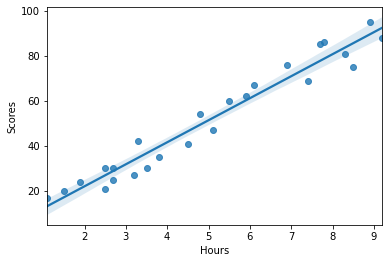

In [6]:
sns.regplot(df['Hours'],df['Scores'])

### as it is clear , it is linearly variable , so lets apply linear model to it

In [7]:
# we observe a linear relation , so lets apply linear model to it
# !pip install sklearn
# !pip install stats
# !pip install scipy
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  

In [8]:
x = df[['Hours']]
y = df['Scores']
lm = LinearRegression()
x_train , x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
lm.fit(x_train,y_train)
slope = lm.coef_
intercept = lm.intercept_
print(slope,intercept)

[9.91065648] 2.018160041434662


In [10]:
# we got out equation y = mx+c ;
def PredictScore(time):
    ans=int(0)
    ans = (slope*time)+intercept
    return ans

### Now , we completed our model ,lets make predictions

In [11]:
pred = lm.predict(x_test)
pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

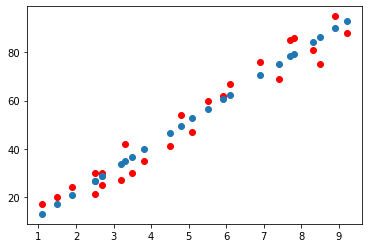

In [12]:
plt.scatter(x,y,color='red')
plt.scatter(x,PredictScore(x))
plt.show()

### Now , lets evaluate our accuracy

In [13]:
from scipy import stats
from sklearn import metrics
df = pd.DataFrame({'Actual: ':y_test,'Marks_pred: ':pred})
print(df)

    Actual:   Marks_pred: 
5         20     16.884145
2         27     33.732261
19        69     75.357018
16        30     26.794801
11        62     60.491033


In [14]:
print("Error: ",metrics.mean_absolute_error(y_test,pred))

Error:  4.183859899002982


### As we have very small data , hence it accuracy it very less, but its fine in such case

### Now , Predict Our task:

In [17]:
time = 9.25

In [18]:
score = PredictScore(time)
print('Predicted Score is ',score)

Predicted Score is  [93.69173249]


### Finally we completed our task 1